### TASK 1: Data scaping

--- ovde dodati neki opis --- 

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import pandas as pd

In [2]:
url_website_base = 'https://freemidi.org'
genre = '/genre-jazz'

In [124]:
def define_soup(url_website_base, genre):
    page = urlopen(url_website_base + genre)
    html_bytes = page.read()
    html = html_bytes.decode("utf-8",errors='ignore')
    soup = BeautifulSoup(html, "html.parser")
    return soup

#### Collect all the jazz songs


In [32]:
def get_a_in_div_tag(soup,class_link):
    list_of_artists = []
    for div in soup.find_all('div', class_= class_link):
             a = div.find('a')
             list_of_artists.append(a['href'])
             #print(a['href'],",", a.get_text())
    return list_of_artists


#### [ARTIST] Make the list of all artist direcories

In [33]:
def load_list_bands(class_link):
    soup = define_soup(url_website_base,genre)
    list_bands = get_a_in_div_tag(soup,class_link) 
    return list_bands


In [34]:
list_bands = load_list_bands('genre-link-text')


In [35]:
print(list_bands[0])

artist-1767-1974-ad


#### List of full paths to artist pages (e.g. https://freemidi.org/artist-1767-1974-ad)

In [36]:
def get_full_url_path_list(list_bands, url_website_base):
    list_of_full_paths = []
    for band in list_bands:
        list_of_full_paths.append(url_website_base + '/' + band)
    return list_of_full_paths

In [37]:
list_of_full_paths = get_full_url_path_list(list_bands, url_website_base)

In [39]:
#print(list_of_full_paths)

#### [SONGS] Now find all the song links per band

In [131]:
def find_all_download_links(list_bands):
   # print(list_bands)
    list_download_links = []
    for band in list_bands:
        #print('band:', band)
        soup_songs = define_soup(url_website_base,'/' + band)
        list_songs = get_a_in_div_tag(soup_songs,'artist-song-cell')
       # print('list songs:', list_songs)
        for song in list_songs:
            #print('song:', song)
            soup_song_download = define_soup(url_website_base,'/' + song)
            a= soup_song_download.find(id = 'downloadmidi')
            list_download_links.append(a['href'])
    print(list_download_links)
    return list_download_links

In [132]:
list_download_links = find_all_download_links(list_bands)

['getter-13560', 'getter-13561', 'getter-13562', 'getter-13563', 'getter-13575', 'getter-13564', 'getter-13565', 'getter-13566', 'getter-13567', 'getter-13568', 'getter-13569', 'getter-13570', 'getter-13571', 'getter-13572', 'getter-13573', 'getter-26711', 'getter-13574', 'getter-13576', 'getter-13416', 'getter-177', 'getter-178', 'getter-179', 'getter-180', 'getter-181', 'getter-22840', 'getter-20237', 'getter-20238', 'getter-20239', 'getter-275', 'getter-276', 'getter-11898', 'getter-11897', 'getter-7881', 'getter-11893', 'getter-11894', 'getter-11899', 'getter-11895', 'getter-7882', 'getter-7883', 'getter-7884', 'getter-7885', 'getter-9570', 'getter-328', 'getter-26199', 'getter-327', 'getter-7890', 'getter-7110', 'getter-7111', 'getter-329', 'getter-7112', 'getter-19889', 'getter-19888', 'getter-12474', 'getter-11399', 'getter-11401', 'getter-11477', 'getter-11402', 'getter-11400', 'getter-11478', 'getter-7896', 'getter-25746', 'getter-22153', 'getter-7897', 'getter-22154', 'getter

Download songs...

In [133]:
import requests
import urllib.request
for dwnld_link in list_download_links:
    r = requests.get(url_website_base + '/' + dwnld_link,allow_redirects=False)
    filename = dwnld_link + '.mid'
    with open(os.getcwd() + '/midiFiles/' + filename, 'wb') as f:
        f.write(r.content)



### TASK 2: read and examine midi files

<b> 1. Instrument partition </b>
<br> Using the Music21 .PartitionByInstrument function, we are able break up the file into individual instruments, if there are multiple instruments. Each instrument contains a list of notes which are extracted and appended to a list. We can then save these into a file using pickle.

In [36]:
#ovde da vidim cisto kako izgleda za jedan fajl

from music21 import converter,instrument # or import *
import pickle
midi = converter.parse('midiFiles/getter-170.mid')
components = []
s2 = instrument.partitionByInstrument(midi)
for part in s2.parts:
    print(part)


<music21.stream.Part BASS>
<music21.stream.Part Fretless Bass>
<music21.stream.Part StringInstrument>
<music21.stream.Part VIBRAPHONE>
<music21.stream.Part Vibraphone>
<music21.stream.Part VIBRAPHONE #2>
<music21.stream.Part>
<music21.stream.Part tom high 1  50>
<music21.stream.Part tom high 2 48>
<music21.stream.Part tom mid 2  45>


In [2]:
import numpy as np
import glob
from music21 import converter, instrument, note, chord, stream

def get_notes(string):
    
    """ Extracts all notes and chords from midi files in the ./midi_songs 
    directory and creates a file with all notes in string format"""
    list_name = []
    
    for file in glob.glob("midiFiles/*.mid"):
        try:
            midi = converter.parse(file)
            print("Parsing %s" % file)

            notes_to_parse = None

            parts = instrument.partitionByInstrument(midi)
            if(parts):
                for part in parts.parts:
                    if string in str(part):
                        print(str(part))
                        notes_to_parse = part.recurse()   
                        for element in notes_to_parse:
                            if isinstance(element, note.Note):
                                list_name.append(str(element.pitch))
                            elif isinstance(element, chord.Chord):
                                list_name.append('.'.join(str(n) for n in element.normalOrder))
        except:
            print('problems with midi parsing...')

    return list_name

In [3]:
piano_list = get_notes('Piano')


Parsing midiFiles\getter-10092.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-10800.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-10801.mid
Parsing midiFiles\getter-10802.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-10803.mid
Parsing midiFiles\getter-10804.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-10805.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-10887.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-11257.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-11261.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-11262.mid
<music21.stream.Part Acoustic Grand Piano, Channel 1>
<music21.stream.Part Piano>
Parsing midiFiles\getter-11263.mid
<music21.stream.Part Acoustic Grand Piano>
<music21.stream.Part Piano>
Parsing midiFiles\getter-11264.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-11265.mid
<music21.stream.Part Piano  4>
<music21.stream.Part Piano>
Parsing midiFiles\getter-11266.mid
Parsing mid

<music21.stream.Part Piano>
Parsing midiFiles\getter-12711.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12712.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12713.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12714.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12715.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12716.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12717.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12718.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12719.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12720.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12794.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12796.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12814.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12822.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-12823.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-13

Parsing midiFiles\getter-14747.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-14748.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-14749.mid
Parsing midiFiles\getter-14750.mid
Parsing midiFiles\getter-14773.mid
Parsing midiFiles\getter-14774.mid
Parsing midiFiles\getter-14775.mid
Parsing midiFiles\getter-14776.mid
Parsing midiFiles\getter-14777.mid
Parsing midiFiles\getter-14778.mid
Parsing midiFiles\getter-14779.mid
Parsing midiFiles\getter-14780.mid
Parsing midiFiles\getter-15515.mid
Parsing midiFiles\getter-15516.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15521.mid
Parsing midiFiles\getter-15522.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15523.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15580.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15582.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15583.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-15584.mid
<music21.stream.Part Digital Piano>
<musi

<music21.stream.Part Piano>
Parsing midiFiles\getter-19847.mid
Parsing midiFiles\getter-19848.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19849.mid
Parsing midiFiles\getter-19850.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19851.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19852.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19853.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19854.mid
Parsing midiFiles\getter-19855.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19856.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19857.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19858.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19859.mid
Parsing midiFiles\getter-19860.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19861.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19862.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-19863.mid
<music21.stream.Part Piano>
Parsing midiF

Parsing midiFiles\getter-21966.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-21967.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-21968.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-21969.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-21970.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-21973.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22061.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22062.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22063.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22064.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22065.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22066.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22067.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22068.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22069.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-22070.mid
<music21.stream.Part

Parsing midiFiles\getter-3312.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-3464.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-3465.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-3466.mid
<music21.stream.Part G.MIDI Acou Grand Piano>
<music21.stream.Part Piano>
<music21.stream.Part Melody (Acou Grand Piano)>
Parsing midiFiles\getter-3735.mid
Parsing midiFiles\getter-3879.mid
Parsing midiFiles\getter-3909.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4069.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4070.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4071.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4072.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4073.mid
Parsing midiFiles\getter-4077.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4078.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-4511.mid
<music21.stream.Part Electric Piano>
<music21.stream.Part Rhodes Piano>
<music21.stream.

Parsing midiFiles\getter-6864.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6865.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6866.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6867.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6868.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6869.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6870.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6871.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6872.mid
<music21.stream.Part Piano>
<music21.stream.Part Chorused Piano>
Parsing midiFiles\getter-6873.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6874.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6875.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6876.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-6877.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-7110.mid
<music21.stream.Part Piano>
Parsing midiFiles\getter-7111.mid

In [5]:
 def save_notes_by_instruments(instrument_name,list_name):
    with open('data/' + instrument_name + '.pickle' , 'wb') as filepath:
        pickle.dump(list_name, filepath)

In [6]:
import pickle
save_notes_by_instruments('Piano',piano_list)

In [10]:
string_list = ['Bass','Drums','Sax']
for string in string_list:
    lista = get_notes(string)
    save_notes_by_instruments(string,lista)

Parsing midiFiles\getter-10092.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-10800.mid
<music21.stream.Part FingerE.Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-10801.mid
Parsing midiFiles\getter-10802.mid
<music21.stream.Part Bass>
<music21.stream.Part Fretless Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-10803.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-10804.mid
<music21.stream.Part Bass>
<music21.stream.Part Fretless Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-10805.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-10887.mid
<music21.stream.Part Finger Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-11257.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-11261.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-11262.mid
Parsing midiFiles\getter-11263.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-

Parsing midiFiles\getter-11946.mid
Parsing midiFiles\getter-11947.mid
Parsing midiFiles\getter-11948.mid
Parsing midiFiles\getter-11949.mid
Parsing midiFiles\getter-11950.mid
Parsing midiFiles\getter-11976.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-12117.mid
<music21.stream.Part Fretless Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-12118.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-12277.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-12278.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-12279.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-12280.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-12282.mid
<music21.stream.Part Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-12283.mid
Parsing midiFiles\getter-12284.mid
<music21.stream.Part Acoustic Bass>
Parsing

Parsing midiFiles\getter-13888.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-13930.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-13931.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-13932.mid
Parsing midiFiles\getter-13933.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-13934.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-14331.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-14332.mid
Parsing midiFiles\getter-14333.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-14334.mid
Parsing midiFiles\getter-14335.mid
Parsing midiFiles\getter-14499.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-14550.mid
Parsing midiFiles\getter-14551.mid
Parsing midiFiles\getter-14552.mid
Parsing midiFiles\getter-14553.mid
Parsing midiFiles\getter-14713.mid
Parsing midiFiles\getter-14714.mid
Parsing midiFiles\getter-14715.mid
Parsing midiFiles\getter-14716.mid
Parsing midi

<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18392.mid
Parsing midiFiles\getter-18393.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18394.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18395.mid
<music21.stream.Part Fretless Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18396.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18397.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18398.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18399.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18400.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18401.mid
Parsing midiFiles\getter-18402.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18403.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-18404.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-18405.mid
Parsing midiFiles\getter-18406.mid
<music2

Parsing midiFiles\getter-19902.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19903.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-19904.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-19905.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19906.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-19907.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-19908.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-19909.mid
<music21.stream.Part Fretless Bass>
<music21.stream.Part Synth Bass 2>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19910.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19911.mid
<music21.stream.Part Bass Drum>
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19912.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-19913.mid
<music21.stream.Part Fretle

<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-22360.mid
Parsing midiFiles\getter-22361.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-22362.mid
Parsing midiFiles\getter-22363.mid
Parsing midiFiles\getter-22364.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-22365.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-22366.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-22367.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-22368.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-2253.mid
Parsing midiFiles\getter-22667.mid
Parsing midiFiles\getter-22668.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-22669.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-22670.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-22696.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-22697.mid
<music21.stream.Part Fretless Bass>
Parsing m

<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-4073.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-4077.mid
Parsing midiFiles\getter-4078.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4511.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4512.mid
<music21.stream.Part Electric Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-4513.mid
<music21.stream.Part Electric Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-4514.mid
<music21.stream.Part Fingered Bass>
<music21.stream.Part Electric Bass>
<music21.stream.Part Synth Bass 2>
Parsing midiFiles\getter-4515.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4516.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4517.mid
<music21.stream.Part Electric Bass (finger)>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4518.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-4519.mid
<music21

Parsing midiFiles\getter-6688.mid
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-6689.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-6690.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-6691.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-6692.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-6693.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-6698.mid
<music21.stream.Part Electric Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-6809.mid
<music21.stream.Part Fingered Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-6810.mid
<music21.stream.Part Bass>
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-6811.mid
<music21.stream.Part Slap Bass 2>
<music21.stream.Part Electric Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-6812.mid
<music21.stream.Part Syn. Bass>
<music21.stream.Part Electric Bass>
Pa

Parsing midiFiles\getter-9402.mid
<music21.stream.Part Bass / Acoustic bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-9403.mid
<music21.stream.Part Bass / Acoustic bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-9410.mid
<music21.stream.Part Bass>
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-9411.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-9412.mid
<music21.stream.Part Electric Bass>
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-9414.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-9570.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-9573.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-9574.mid
<music21.stream.Part Electric Bass>
Parsing midiFiles\getter-9575.mid
<music21.stream.Part Acoustic Bass>
Parsing midiFiles\getter-9576.mid
<music21.stream.Part Electric Bass>
<music21.stream.Part Fretless Bass>
Parsing midiFiles\getter-9577.mid
<music21.st

Parsing midiFiles\getter-13568.mid
Parsing midiFiles\getter-13569.mid
Parsing midiFiles\getter-13570.mid
Parsing midiFiles\getter-13571.mid
Parsing midiFiles\getter-13572.mid
Parsing midiFiles\getter-13573.mid
Parsing midiFiles\getter-13574.mid
Parsing midiFiles\getter-13575.mid
Parsing midiFiles\getter-13576.mid
Parsing midiFiles\getter-13590.mid
Parsing midiFiles\getter-13591.mid
Parsing midiFiles\getter-13613.mid
Parsing midiFiles\getter-13614.mid
Parsing midiFiles\getter-13615.mid
Parsing midiFiles\getter-13616.mid
Parsing midiFiles\getter-13696.mid
Parsing midiFiles\getter-13697.mid
Parsing midiFiles\getter-13698.mid
Parsing midiFiles\getter-13699.mid
Parsing midiFiles\getter-13806.mid
Parsing midiFiles\getter-13807.mid
Parsing midiFiles\getter-13808.mid
Parsing midiFiles\getter-13809.mid
Parsing midiFiles\getter-13810.mid
Parsing midiFiles\getter-13811.mid
Parsing midiFiles\getter-13812.mid
Parsing midiFiles\getter-13813.mid
Parsing midiFiles\getter-13814.mid
Parsing midiFiles\ge

Parsing midiFiles\getter-19842.mid
Parsing midiFiles\getter-19843.mid
Parsing midiFiles\getter-19844.mid
Parsing midiFiles\getter-19845.mid
Parsing midiFiles\getter-19846.mid
Parsing midiFiles\getter-19847.mid
Parsing midiFiles\getter-19848.mid
Parsing midiFiles\getter-19849.mid
Parsing midiFiles\getter-19850.mid
Parsing midiFiles\getter-19851.mid
Parsing midiFiles\getter-19852.mid
Parsing midiFiles\getter-19853.mid
Parsing midiFiles\getter-19854.mid
Parsing midiFiles\getter-19855.mid
Parsing midiFiles\getter-19856.mid
Parsing midiFiles\getter-19857.mid
Parsing midiFiles\getter-19858.mid
Parsing midiFiles\getter-19859.mid
Parsing midiFiles\getter-19860.mid
Parsing midiFiles\getter-19861.mid
Parsing midiFiles\getter-19862.mid
Parsing midiFiles\getter-19863.mid
Parsing midiFiles\getter-19864.mid
Parsing midiFiles\getter-19865.mid
Parsing midiFiles\getter-19866.mid
Parsing midiFiles\getter-19867.mid
Parsing midiFiles\getter-19868.mid
Parsing midiFiles\getter-19869.mid
Parsing midiFiles\ge

Parsing midiFiles\getter-24996.mid
Parsing midiFiles\getter-24997.mid
Parsing midiFiles\getter-24998.mid
Parsing midiFiles\getter-24999.mid
Parsing midiFiles\getter-25000.mid
Parsing midiFiles\getter-25025.mid
Parsing midiFiles\getter-25026.mid
Parsing midiFiles\getter-25091.mid
Parsing midiFiles\getter-25202.mid
Parsing midiFiles\getter-25221.mid
Parsing midiFiles\getter-25228.mid
Parsing midiFiles\getter-25291.mid
Parsing midiFiles\getter-25292.mid
Parsing midiFiles\getter-25515.mid
Parsing midiFiles\getter-25544.mid
Parsing midiFiles\getter-25588.mid
Parsing midiFiles\getter-25628.mid
problems with midi parsing...
Parsing midiFiles\getter-25643.mid
Parsing midiFiles\getter-25706.mid
Parsing midiFiles\getter-25746.mid
Parsing midiFiles\getter-26136.mid
Parsing midiFiles\getter-26199.mid
Parsing midiFiles\getter-26202.mid
Parsing midiFiles\getter-26255.mid
Parsing midiFiles\getter-26635.mid
Parsing midiFiles\getter-26649.mid
Parsing midiFiles\getter-26689.mid
Parsing midiFiles\getter-

Parsing midiFiles\getter-9396.mid
Parsing midiFiles\getter-9397.mid
Parsing midiFiles\getter-9400.mid
Parsing midiFiles\getter-9401.mid
Parsing midiFiles\getter-9402.mid
Parsing midiFiles\getter-9403.mid
Parsing midiFiles\getter-9410.mid
Parsing midiFiles\getter-9411.mid
Parsing midiFiles\getter-9412.mid
Parsing midiFiles\getter-9414.mid
Parsing midiFiles\getter-9570.mid
Parsing midiFiles\getter-9573.mid
Parsing midiFiles\getter-9574.mid
Parsing midiFiles\getter-9575.mid
Parsing midiFiles\getter-9576.mid
Parsing midiFiles\getter-9577.mid
Parsing midiFiles\getter-9578.mid
Parsing midiFiles\getter-9579.mid
Parsing midiFiles\getter-9583.mid
Parsing midiFiles\getter-9585.mid
Parsing midiFiles\getter-9599.mid
Parsing midiFiles\getter-9603.mid
Parsing midiFiles\getter-9625.mid
Parsing midiFiles\getter-9637.mid
Parsing midiFiles\getter-9647.mid
Parsing midiFiles\getter-9650.mid
Parsing midiFiles\getter-9692.mid
Parsing midiFiles\getter-9711.mid
problems with midi parsing...
Parsing midiFiles\

<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-12434.mid
Parsing midiFiles\getter-12435.mid
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-12436.mid
Parsing midiFiles\getter-12437.mid
<music21.stream.Part Alto Saxophone>
problems with midi parsing...
Parsing midiFiles\getter-12709.mid
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-12710.mid
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Baritone Saxophone>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-12711.mid
<music21.stream.Part Baritone Saxophone>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-12712.mid
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-12713.mid
Parsing midiFiles\getter-12714.mid
Parsing midiFiles\getter-12715.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-12716.mid
<music21.stream.Part Tenor Saxophone>
<music21.str

Parsing midiFiles\getter-15584.mid
<music21.stream.Part Tenor Sax>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-15585.mid
Parsing midiFiles\getter-15592.mid
Parsing midiFiles\getter-15593.mid
Parsing midiFiles\getter-15594.mid
Parsing midiFiles\getter-15595.mid
<music21.stream.Part Soprano Saxophone>
Parsing midiFiles\getter-15597.mid
<music21.stream.Part Soprano Sax>
<music21.stream.Part Soprano Saxophone>
Parsing midiFiles\getter-15598.mid
Parsing midiFiles\getter-15599.mid
Parsing midiFiles\getter-15600.mid
Parsing midiFiles\getter-15601.mid
<music21.stream.Part Tenor Sax>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-15602.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-15603.mid
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-15604.mid
Parsing midiFiles\getter-15605.mid
Parsing midiFiles\getter-15817.mid
Parsing midiFiles\getter-15818.mid
Parsing midiFiles\getter-15819.mid
<mu

Parsing midiFiles\getter-19882.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-19883.mid
Parsing midiFiles\getter-19884.mid
Parsing midiFiles\getter-19885.mid
Parsing midiFiles\getter-19886.mid
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-19888.mid
Parsing midiFiles\getter-19889.mid
Parsing midiFiles\getter-19890.mid
<music21.stream.Part Sax.>
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-19891.mid
<music21.stream.Part Alto Sax>
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-19892.mid
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-19893.mid
Parsing midiFiles\getter-19894.mid
Parsing midiFiles\getter-19895.mid
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-19896.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-19897.mid
<music21.stream.Part Sax>
<music21.stream.Part Alto Saxophone>
Parsing mi

Parsing midiFiles\getter-24083.mid
Parsing midiFiles\getter-24084.mid
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-24085.mid
Parsing midiFiles\getter-24086.mid
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-24087.mid
Parsing midiFiles\getter-24088.mid
Parsing midiFiles\getter-24089.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-24090.mid
Parsing midiFiles\getter-24091.mid
Parsing midiFiles\getter-24092.mid
Parsing midiFiles\getter-24093.mid
Parsing midiFiles\getter-24241.mid
Parsing midiFiles\getter-24242.mid
Parsing midiFiles\getter-24243.mid
<music21.stream.Part Soprano Saxophone>
Parsing midiFiles\getter-24986.mid
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-24987.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-24988.mid
Parsing midiFiles\getter-24989.mid
Parsing midiFiles\getter-24990.mid
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-24991.mid
<music21.stream.Part Tenor S

Parsing midiFiles\getter-6679.mid
<music21.stream.Part Tenor Saxophone>
Parsing midiFiles\getter-6680.mid
<music21.stream.Part Soprano Saxophone>
Parsing midiFiles\getter-6682.mid
Parsing midiFiles\getter-6683.mid
<music21.stream.Part Soprano Saxophone>
Parsing midiFiles\getter-6684.mid
Parsing midiFiles\getter-6685.mid
Parsing midiFiles\getter-6686.mid
Parsing midiFiles\getter-6687.mid
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-6688.mid
Parsing midiFiles\getter-6689.mid
Parsing midiFiles\getter-6690.mid
Parsing midiFiles\getter-6691.mid
Parsing midiFiles\getter-6692.mid
Parsing midiFiles\getter-6693.mid
Parsing midiFiles\getter-6698.mid
Parsing midiFiles\getter-6809.mid
Parsing midiFiles\getter-6810.mid
Parsing midiFiles\getter-6811.mid
<music21.stream.Part Tenor Sax>
<music21.stream.Part Alto Saxophone>
Parsing midiFiles\getter-6812.mid
Parsing midiFiles\getter-6813.mid
<music21.stream.Part Baritone Saxophone>
Parsing midiFiles\getter-6815.mid
Parsing midiFiles\get

In [37]:
#for listing down the file names
import os
#Array Processing
import numpy as np
import pickle

#notes = get_notes()
with open('data/Piano.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
print(unserialized_data[1])

C2


1. srediti input za LSTM 
2. napisati konstrukciju mreze
3. treniranje 
<br> (1,2,3 u colabu)</br>
4. test


Analyze data:

In [38]:
import numpy as np
notes_array = np.array(unserialized_data)

In [39]:
#No. of unique notes
unique_notes = list(set(notes_array))
print(len(unique_notes))

1301


(array([1.278e+03, 1.400e+01, 7.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 6.82270e+03, 1.36444e+04, 2.04661e+04, 2.72878e+04,
        3.41095e+04, 4.09312e+04, 4.77529e+04, 5.45746e+04, 6.13963e+04,
        6.82180e+04]),
 <a list of 10 Patch objects>)

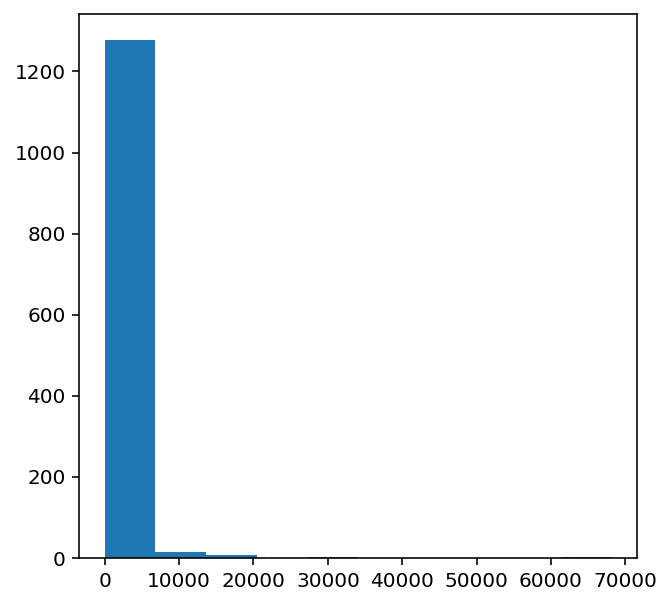

In [40]:
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_array))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

let us keep the top frequent notes and ignore the low-frequency ones.

In [41]:
frequent_notes = [note_ for note_, count in freq.items() if count>=40]
print(len(frequent_notes))

501


In [35]:
#Now, let us prepare new musical files which contain only the top frequent notes
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)

with open('data/Piano_high_freq_only' + '.pickle' , 'wb') as filepath:
        pickle.dump(new_music, filepath)

['5', '9', '0']
